In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [134]:
X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

y = np.array(
    [
        [0],
        [1],
        [1],
        [0]])

In [135]:
class MultiLayerPerceptron:
    
    def __init__(self, train_data, truth, learning_rate=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        # 訓練資料
        self.train_data = train_data
        # ground truth
        self.truth = truth
        # 訓練率
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # weights_01: 隱藏層的權重
        # weights_12: 輸出層的權重
        self.weights_01 = np.random.uniform(size=(num_input, num_hidden))
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output))

        # b01: 隱藏層的常數
        # b12: 輸出層的常數
        self.b01 = np.random.uniform(size=(1,num_hidden))
        self.b12 = np.random.uniform(size=(1,num_output))

        self.losses = []
    def update_weights(self):
        # loss 方差
        loss = 0.5 * (self.truth - self.output_final) ** 2
        self.losses.append(np.sum(loss))

        #倒傳遞
        
        error_term = (self.truth - self.output_final)

        # 計算隱藏層的梯度
        grad01 = self.train_data.T @ (((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out))

        # 計算輸出層的梯度
        grad12 = self.hidden_out.T @ (error_term * self._delsigmoid(self.output_final))

        # 將梯度乘上learning rate 反映到各層的權重
        self.weights_01 += self.learning_rate * grad01
        self.weights_12 += self.learning_rate * grad12

        # 常數也一樣
        self.b01 += np.sum(self.learning_rate * ((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out), axis=0)
        self.b12 += np.sum(self.learning_rate * error_term * self._delsigmoid(self.output_final), axis=0)

    def _sigmoid(self, x):
        # 啟動函數為 sigmoid (0~1)
        return 1 / (1 + np.exp(-x))

    def _delsigmoid(self, x):
        # sigmoid 的一階微分，在倒傳遞時使用
        return x * (1 - x)

    def forward(self, batch):
        #向前傳遞 經過隱藏層 -> sigmoid -> 輸出層 -> sigmoid
        
        self.hidden_ = np.dot(batch, self.weights_01) + self.b01
        self.hidden_out = self._sigmoid(self.hidden_)

        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12
        self.output_final = self._sigmoid(self.output_)

        return self.output_final

    def predict(self, datapoint):
        # 如果 sigmoid 出來後大於 0.5 代表是 1 
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1

        return 0

    def plot(self, h=0.01):

        sns.set_style('darkgrid')
        plt.figure(figsize=(10, 10))
        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)
        colors = {
            0: "ro",
            1: "go"
        }
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.truth[i][0]],
                     markersize=20)
        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.predict([x, y]) for x in x_range] for y in y_range])
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

    def train(self):
        for _ in range(self.num_epochs):
            self.forward(self.train_data)
            self.update_weights()
            

In [136]:
mlp = MultiLayerPerceptron(X, y, 0.2, 8000)
mlp.train()

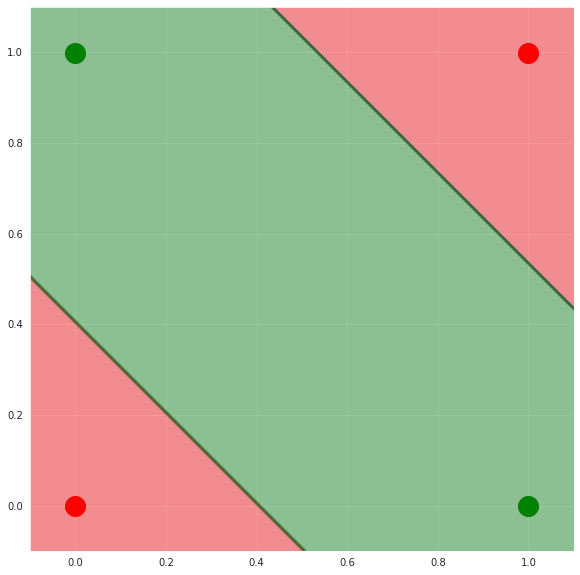

In [137]:
mlp.plot()

In [138]:
i = np.random.randint(2,size=200)
j = np.random.randint(2,size=200)
test_y = i^j
test_X = np.vstack((i,j)).T

error = 0
for a,b in zip(test_X,test_y):
  if mlp.predict(a) != b:
    error+=1
print("Error rate is :",error/2,"%")    

Error rate is : 0.0 %


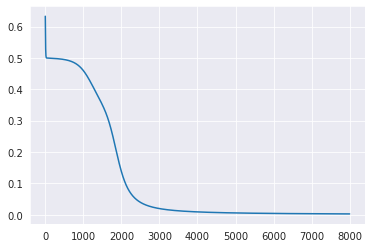

In [139]:
plt.plot(mlp.losses)